In [1]:
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
import os
import cv2
from keras.models import Sequential,load_model,Model

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
import tempfile
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

path = "/kaggle/input/utk-gender/UTKFace"
files = os.listdir(path)
size = len(files)
print("Total samples:", size)

np.random.seed(10)
np.random.shuffle(files)

train_files = files[:int(0.8 * size)]
test_files = files[int(0.8 * size):]

temp_dir = tempfile.mkdtemp()

for label in ['0', '1']: 
    os.makedirs(os.path.join(temp_dir, label), exist_ok=True)

for file in train_files:
    src_path = os.path.join(path, file)
    label = file.split('_')[1]
    dst_path = os.path.join(temp_dir, label, file)
    shutil.copyfile(src_path, dst_path)

data_generator = ImageDataGenerator(
    rescale=1.0 / 255.0,
    dtype='float32'
)

train_generator = data_generator.flow_from_directory(
    directory=temp_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True 
)

print("Number of training samples:", len(train_files))

x_train, y_gender = next(train_generator)
print("Shape of x_train:", x_train.shape)
print("Shape of y_gender:", y_gender.shape)

Total samples: 23708
Found 18966 images belonging to 2 classes.
Number of training samples: 18966
Shape of x_train: (32, 224, 224, 3)
Shape of y_gender: (32,)


In [3]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2

MaxPool2D = MaxPooling2D
model = Sequential(name="Alexnet")

model.add(Conv2D(filters= 96, kernel_size= (11,11), strides=(4,4), padding='valid',kernel_regularizer=l2(0.0005), input_shape = (224,224,3),activation="relu"))
model.add(MaxPool2D(pool_size=(3,3), strides= (2,2), padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same',kernel_regularizer=l2(0.0005), activation="relu"))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1),kernel_regularizer=l2(0.0005), padding='same', activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), kernel_regularizer=l2(0.0005), padding='same',activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), kernel_regularizer=l2(0.0005), padding='same',activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))

model.add(Flatten())
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1, activation = 'sigmoid'))

print(model.summary())

Model: "Alexnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                           

In [4]:
from tensorflow.keras import optimizers
SGD=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy',
              optimizer=SGD,
              metrics=['accuracy'])

In [5]:
model.fit(train_generator, epochs=20, batch_size=16)

Epoch 1/20
593/593 [==============================] - 38s 47ms/step - loss: 2.6877 - accuracy: 0.6146
Epoch 2/20
593/593 [==============================] - 28s 47ms/step - loss: 1.1467 - accuracy: 0.7458
Epoch 3/20
593/593 [==============================] - 27s 45ms/step - loss: 0.9734 - accuracy: 0.8196
Epoch 4/20
593/593 [==============================] - 28s 47ms/step - loss: 0.8745 - accuracy: 0.8380
Epoch 5/20
593/593 [==============================] - 29s 49ms/step - loss: 0.7951 - accuracy: 0.8517
Epoch 6/20
593/593 [==============================] - 27s 46ms/step - loss: 0.7322 - accuracy: 0.8593
Epoch 7/20
593/593 [==============================] - 27s 45ms/step - loss: 0.6693 - accuracy: 0.8698
Epoch 8/20
593/593 [==============================] - 28s 47ms/step - loss: 0.6230 - accuracy: 0.8734
Epoch 9/20
593/593 [==============================] - 28s 47ms/step - loss: 0.5779 - accuracy: 0.8801
Epoch 10/20
593/593 [==============================] - 27s 45ms/step - loss: 0.539

In [6]:
temp_dir2 = tempfile.mkdtemp()

# Create subdirectories based on class labels in the temporary directory
for label in ['0', '1']:  # Assuming 'gender' has labels 0 and 1
    os.makedirs(os.path.join(temp_dir2, label), exist_ok=True)

# Copy the test files to the appropriate subdirectories based on class labels
for file in test_files:
    src_path1 = os.path.join(path, file)
    label = file.split('_')[1]
    os.makedirs(os.path.join(temp_dir2, label), exist_ok=True)  # Create subdirectory if not exist
    dst_path1 = os.path.join(temp_dir2, label, file)
    shutil.copyfile(src_path1, dst_path1)

# Create the data generator for loading and preprocessing test images
data_generator_test = ImageDataGenerator(
    rescale=1.0 / 255.0,
    dtype='float32'
)

# Create the test generator
test_generator = data_generator_test.flow_from_directory(
    directory=temp_dir2,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Set class_mode to 'binary'
    classes=['0', '1'],   # Provide the class labels explicitly
    shuffle=False          # Set to False to keep the order of test samples
)

# Display the number of test samples
print("Number of test samples:", len(test_generator.filenames))

# Display the shape of the input data and labels for the test set
x_test, y_gender_test = next(test_generator)
print("Shape of x_test:", x_test.shape)
print("Shape of y_gender_test:", y_gender_test.shape)

Found 4742 images belonging to 2 classes.
Number of test samples: 4742
Shape of x_test: (32, 224, 224, 3)
Shape of y_gender_test: (32,)


In [8]:
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image
img_path = "/kaggle/input/utk-gender/UTKFace/"+test_files[12]
img_file = test_files[12]
img = load_img(img_path, grayscale=False)
img = img.resize((224,224), Image.LANCZOS)
img = np.array(img)

img = img.reshape(1, 224,224,3)
img.shape

img = img/255
input_size = (224,224,3)

Original: Gender =  Female
1/1 [==============================] - 0s 271ms/step
Prediction: Gender =  Female


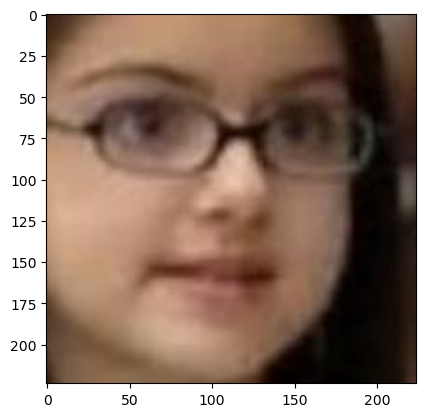

In [9]:
gender_dict = {0:"Male",1:"Female"}
ind = int(img_file.split('_')[1])

print("Original: Gender = ", gender_dict[ind])

pred = model.predict(img.reshape(1, 224, 224, 3))
if(pred > 0.5):
    pred_gender = gender_dict[1]

else:
    pred_gender = gender_dict[0]


print("Prediction: Gender = ", pred_gender)
plt.imshow(img.reshape(224,224,3))

In [10]:
img_path = "/kaggle/input/utk-gender/UTKFace/"+test_files[1500]
img_file = test_files[1500]
img = load_img(img_path , grayscale=False)
img = img.resize((224,224), Image.LANCZOS)
img = np.array(img)

img = img.reshape(1, 224,224,3)
img.shape

img = img/255
input_size = (224,224,3)

Original: Gender =  Female
1/1 [==============================] - 0s 19ms/step
Prediction: Gender =  Female


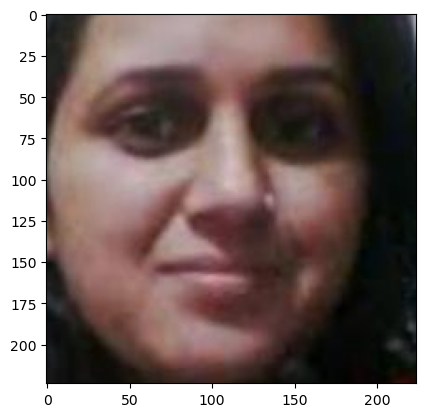

In [11]:
gender_dict = {0:"Male",1:"Female"}
ind = int(img_file.split('_')[1])
print("Original: Gender = ", gender_dict[ind])

pred = model.predict(img.reshape(1, 224, 224, 3))
if(pred > 0.5):
    pred_gender = gender_dict[1]

else:
    pred_gender = gender_dict[0]


print("Prediction: Gender = ", pred_gender)
plt.imshow(img.reshape(224,224,3))

In [14]:
img_path = "/kaggle/input/utk-gender/UTKFace/"+test_files[4004]
img_file = test_files[4004]
img = load_img(img_path , grayscale=False)
img = img.resize((224,224), Image.LANCZOS)
img = np.array(img)

img = img.reshape(1, 224,224,3)
img.shape

img = img/255
input_size = (224,224,3)

Original: Gender =  Male
1/1 [==============================] - 0s 20ms/step
Prediction: Gender =  Male


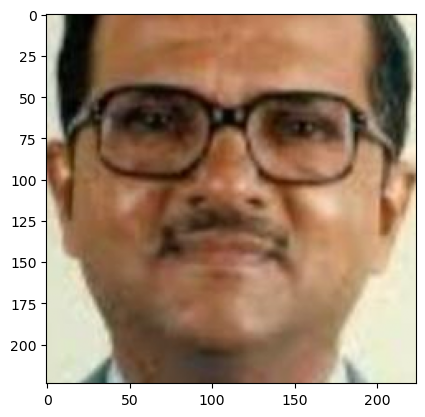

In [15]:
gender_dict = {0:"Male",1:"Female"}
ind = int(img_file.split('_')[1])
print("Original: Gender = ", gender_dict[ind])

pred = model.predict(img.reshape(1, 224, 224, 3))
if(pred > 0.5):
    pred_gender = gender_dict[1]

else:
    pred_gender = gender_dict[0]


print("Prediction: Gender = ", pred_gender)
plt.imshow(img.reshape(224,224,3))

In [16]:
loss, accuracy = model.evaluate(test_generator)
print("Testing accuracy is: ",accuracy)

149/149 [==============================] - 7s 44ms/step - loss: 0.3804 - accuracy: 0.8870
Testing accuracy is:  0.8869675397872925


In [17]:
# Create an empty list to store all the labels for all batches
all_y_gender_test = []

# Loop through the test_generator to get all the batches
for i in range(len(test_generator)):
    # Get the next batch of data and labels
    x_batch, y_gender_batch = next(test_generator)
    
    # Append the batch labels to the list
    all_y_gender_test.extend(y_gender_batch)

# Convert the list to a NumPy array for further processing (optional)
all_y_gender_test = np.array(all_y_gender_test)

# Display the shape of the concatenated y_gender_test
print("Shape of all_y_gender_test:", all_y_gender_test.shape)

Shape of all_y_gender_test: (4742,)


In [18]:
pred = model.predict(test_generator)
predicted_labels = []
batch_labels = (pred > 0.5).astype(int)
predicted_labels.extend(batch_labels)
predicted_labels = np.array(predicted_labels)

149/149 [==============================] - 6s 41ms/step


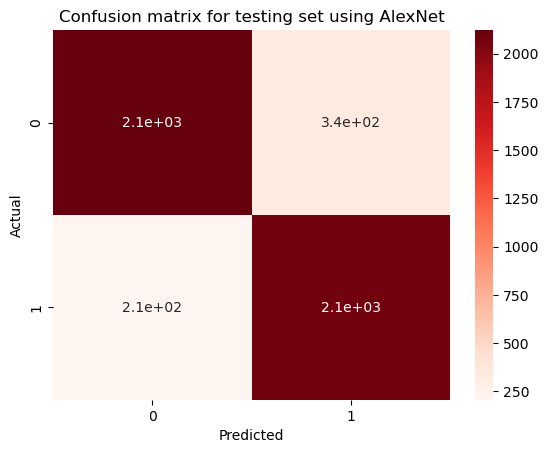

In [19]:
# Compute confusion
sns.heatmap(confusion_matrix(all_y_gender_test, predicted_labels), annot=True, cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for testing set using AlexNet')
plt.show()

In [20]:
#precision
an_precision = precision_score(all_y_gender_test, predicted_labels)
print("Precision:",an_precision)
print("\n")
#recall
an_recall = recall_score(all_y_gender_test, predicted_labels)
print("Recall:",an_recall)
print("\n")
#f1score
an_f1score = f1_score(all_y_gender_test, predicted_labels)
print("F1 score:",an_f1score)
print("\n")
# Computing the true positive rate and false positive rate 
an_cm = confusion_matrix(all_y_gender_test, predicted_labels)
an_tpr = an_cm[1, 1] / (an_cm[1, 1] + an_cm[1, 0])
an_fpr = an_cm[0, 1] / (an_cm[0, 1] + an_cm[0, 0])
print("True positive rate:", an_tpr)
print("\n")
print("False positive rate:", an_fpr)

Precision: 0.8611686697057604


Recall: 0.9094091903719912


F1 score: 0.8846317581949766


True positive rate: 0.9094091903719912


False positive rate: 0.13634513634513634
